# SSENSE.COM Product EDA 

### As of 12/23/2019

In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Loading & Formatting

In [2]:
all_products_df = pd.read_csv('C:/Users/tring/Desktop/SSENSE Project/eda/all_info.csv', sep = '|', header = 0)

In [3]:
all_products_df.head()

,creation-date,sub-category,brand,name,sku,description,origin,composition,full-price,sale-price,discount-percent,remaining-sizes,image
0,2019-12-18,beanies,The Elder Statesman,Black Short Bunny Echo Beanie,201014M138001,Rib knit cashmere beanie in black. Rolled brim...,United States,100% cashmere.,355,355,0,['UNI'],https://img.ssensemedia.com/images/201014M1380...
1,2019-12-18,beanies,PS by Paul Smith,Red Wool Zebra Beanie,201422M138012,Rib knit lambswool beanie in red. Signature gr...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
2,2019-12-18,beanies,PS by Paul Smith,Black Wool Zebra Beanie,201422M138013,Rib knit lambswool beanie in navy. Signature g...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...
3,2019-12-18,iphone cases,Maison Margiela,Black Pouch iPhone Case,201168M170261,Grained leather shoulder bag-style iPhone case...,Italy,Leather.,420,420,0,['UNI'],https://img.ssensemedia.com/images/201168M1702...
4,2019-12-18,necklaces,Maison Margiela,Silver Key Necklace,201168M145213,Curb chain necklace in sterling silver. Logo a...,Italy,925 sterling silver.,635,635,0,['UNI'],https://img.ssensemedia.com/images/201168M1452...


In [4]:
len(all_products_df)

28992

In [5]:
all_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28992 entries, 0 to 28991
Data columns (total 13 columns):
creation-date       28992 non-null object
sub-category        28992 non-null object
brand               28992 non-null object
name                28992 non-null object
sku                 28992 non-null object
description         28992 non-null object
origin              28992 non-null object
composition         28991 non-null object
full-price          28992 non-null int64
sale-price          28992 non-null int64
discount-percent    28992 non-null int64
remaining-sizes     28992 non-null object
image               28992 non-null object
dtypes: int64(3), object(10)
memory usage: 2.9+ MB


## Basic Statistics & Visualization

In [6]:
#There are 4 unique sub-categories in total

len(set(all_products_df['sub-category']))

88

In [7]:
#There are 443 unique brands in total

len(set(all_products_df['brand']))

438

In [8]:
all_products_df[['sub-category','sku']].groupby(['sub-category']).count().sort_values(by = ['sku'], ascending = False)

,sku
sub-category,
t shirts,3365
low top sneakers,1969
shirts,1944
trousers,1748
hoodies zipups,1650
...,...
headphones,3
boat shoes moccassins,2
wingtip boots,2


T-shirt dominates other categories with the most number of SKUs with 3365 products, followed by sneakers.

In [9]:
all_products_df[['brand','sku']].groupby(['brand']).count().sort_values(by = ['sku'], ascending = False)

,sku
brand,
Gucci,1306
Off-White,623
Givenchy,579
Paul Smith,544
Prada,515
...,...
Native Sons,1
BLYSZAK,1
H by Hudson,1


Gucci dominates all other brands with most number of SKUs, followed by Off-White which only has half of what Gucci has.

In [10]:
all_products_df[['origin','sku']].groupby(['origin']).count().sort_values(by = ['sku'], ascending = False)

,sku
origin,
Italy,10637
Imported,9750
Portugal,3314
Japan,2123
United States,1199
South Korea,405
United Kingdom,339
Spain,294
Canada,286


Surprisingly, Italy dominates country of origin category with 10,637 SKUs made there. Not far from the first place is Imported, which technically means other countries not on the list.

In [11]:
from collections import Counter
subcat_counter = Counter(all_products_df['sub-category'])

In [12]:
top5_subcat = dict(Counter(subcat_counter).most_common(5))

print(top5_subcat)

{'t shirts': 3365, 'low top sneakers': 1969, 'shirts': 1944, 'trousers': 1748, 'hoodies zipups': 1650}


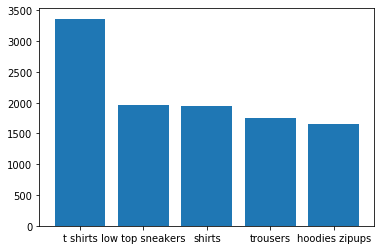

In [13]:
plt.bar(range(len(top5_subcat)), list(top5_subcat.values()), align='center')
plt.xticks(range(len(top5_subcat)), list(top5_subcat.keys()))

plt.show()

In [14]:
bottom5_subcat_name = sorted(subcat_counter, key=subcat_counter.get, reverse=False)[:5]
bottom5_subcat = dict()

for i in bottom5_subcat_name:
    bottom5_subcat[i] = subcat_counter[i]

print(bottom5_subcat)

{'tuxedos': 1, 'waistcoats': 1, 'wingtip boots': 2, 'boat shoes moccassins': 2, 'headphones': 3}


Least common five items are Rings, Kneepads, and 'Sunglassses'. One thing to note is that some of these least common items have names that contain typos such as 'Sunglassses' with 3 s's.

In [15]:
def top5(column):
    counter = Counter(column)
    
    return dict(Counter(counter).most_common(5))

In [16]:
def bottom5(column):
    counter = Counter(column)
    
    bottom5_name = sorted(counter, key=counter.get, reverse=False)[:5]
    
    bottom5 = dict()
    
    
    for i in bottom5_name:
        bottom5[i] = counter[i]
    
    return bottom5

In [17]:
top5_brand = top5(all_products_df['brand'])

print(top5_brand)

{'Gucci': 1306, 'Off-White': 623, 'Givenchy': 579, 'Paul Smith': 544, 'Prada': 515}


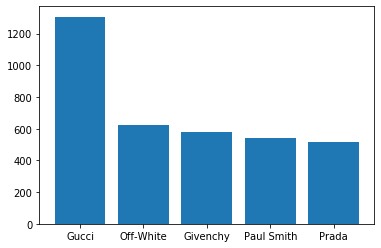

In [18]:
plt.bar(range(len(top5_brand)), list(top5_brand.values()), align='center')
plt.xticks(range(len(top5_brand)), list(top5_brand.keys()))

plt.show()

The most common brand is Gucci. With half of the number of products, Off-White comes second.

In [19]:
bottom5_brand = bottom5(all_products_df['brand'])

print(bottom5_brand)

{'Native Sons': 1, 'BLYSZAK': 1, 'Gosha Rubchinskiy': 1, 'Blondey': 1, 'Éditions M.R': 1}


In [20]:
seperator = " "
brand_words = seperator.join(all_products_df['brand'])

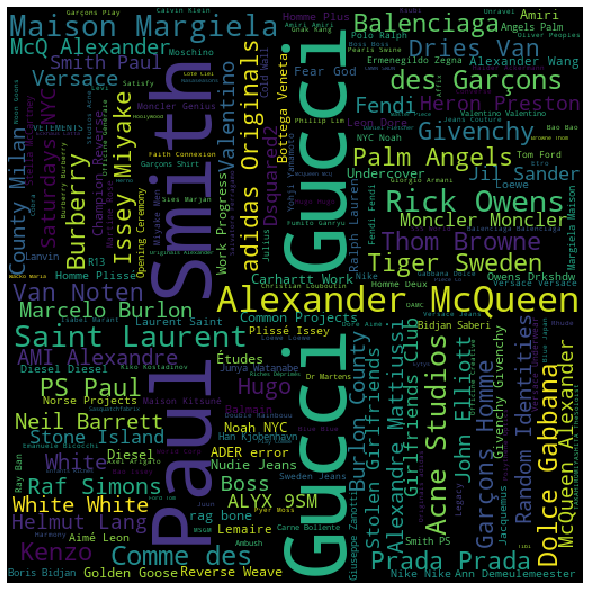

In [21]:
brand_wc = WordCloud(width = 512,height = 512).generate(brand_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(brand_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Let's look at price and check if there is any pattern with respect to price and brand or category.

C:\Users\tring\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


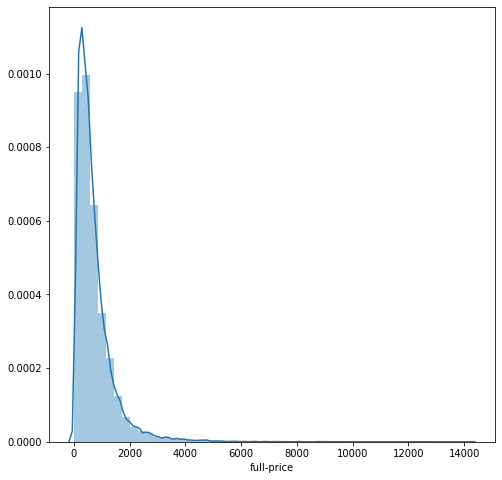

In [22]:
plt.figure(figsize=(8,8))

sns.distplot(all_products_df['full-price']);

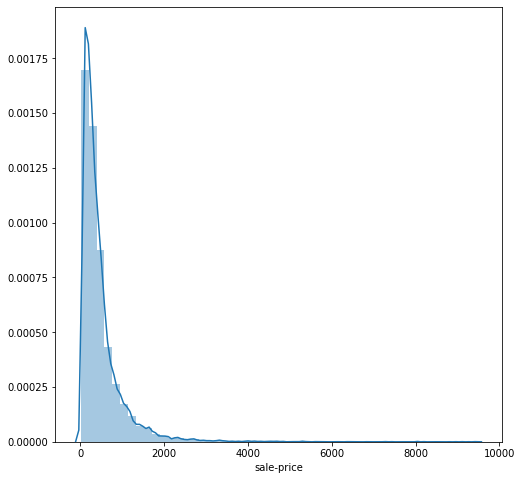

In [23]:
plt.figure(figsize=(8,8))

sns.distplot(all_products_df['sale-price']);

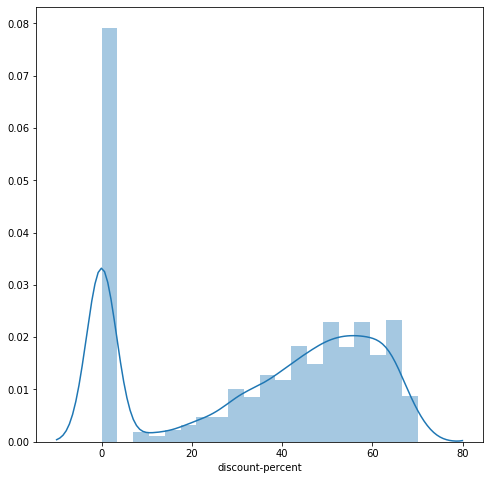

In [24]:
plt.figure(figsize=(8,8))

sns.distplot(all_products_df['discount-percent']);

It doe not seem discount percentage follows any pattern. One issue is that the list comprises of full priced items that do not go on sale.

Distribution for all prices seems to be rightly skewed with very very long right tail. It seems that no particular price accounts for even 0.02% overall. Let's classify these price into price range to see if we will get better resutls.

In [25]:
all_products_df['price_range'] = '0-50'

all_products_df.loc[all_products_df['full-price'] > 50, 'price_range'] = '51-100'
all_products_df.loc[all_products_df['full-price'] > 100, 'price_range'] = '101-250'
all_products_df.loc[all_products_df['full-price'] > 250, 'price_range'] = '251-500'
all_products_df.loc[all_products_df['full-price'] > 500, 'price_range'] = '501-1000'
all_products_df.loc[all_products_df['full-price'] > 1000, 'price_range'] = '1001-2500'
all_products_df.loc[all_products_df['full-price'] > 2500, 'price_range'] = '2500-5000'
all_products_df.loc[all_products_df['full-price'] > 5000, 'price_range'] = '5000+'

In [26]:
all_products_df['price_range'].value_counts().index

Index(['501-1000', '251-500', '1001-2500', '101-250', '51-100', '2500-5000',
       '0-50', '5000+'],
      dtype='object')

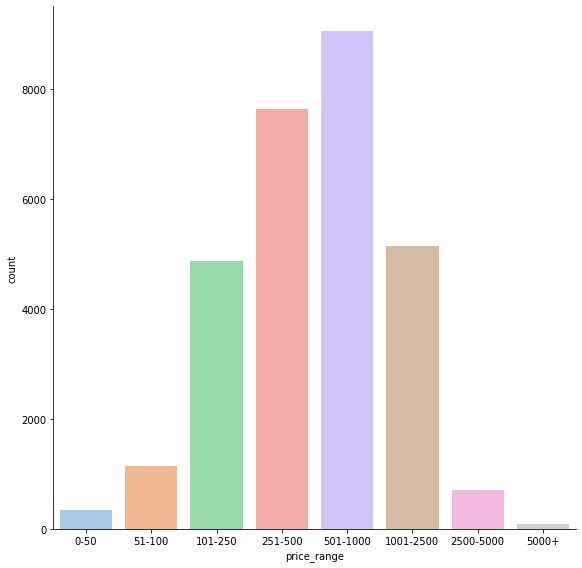

In [27]:
sns.catplot(x='price_range', kind='count', palette="pastel", data=all_products_df, height = 8, order= ['0-50','51-100', 
                                                                                                    '101-250', '251-500',
                                                                                                    '501-1000','1001-2500',
                                                                                                    '2500-5000', '5000+']);

With price range, the distribution now looks less skewed and more centered.

In [28]:
def get_minmax_item(attr_column, maxormin):
    from PIL import Image
    import requests
    from io import BytesIO
    
    if maxormin == 'max':
        details = all_products_df[all_products_df[attr_column] == max(all_products_df[attr_column])][['sub-category', 'brand', 
                                                                            'name', 'full-price','sale-price']]
        response = requests.get(all_products_df[all_products_df[attr_column] == max(all_products_df[attr_column])]['image'].values[0])
        img = Image.open(BytesIO(response.content))
        img = img.resize((328, 706), Image.ANTIALIAS)

        
    if maxormin == 'min':
        details = all_products_df[all_products_df[attr_column] == min(all_products_df[attr_column])][['sub-category', 'brand', 
                                                                            'name', 'full-price','sale-price']]
        response = requests.get(all_products_df[all_products_df[attr_column] == min(all_products_df[attr_column])]['image'].values[0])
        img = Image.open(BytesIO(response.content))
        img = img.resize((285, 321), Image.ANTIALIAS)
    
    return details, img

In [29]:
details, img = get_minmax_item('full-price', 'max')

In [30]:
details

,sub-category,brand,name,full-price,sale-price
14571,fur shearling coats,Fendi,Reversible Grey & Black Shearling FF Jacket,14200,5396


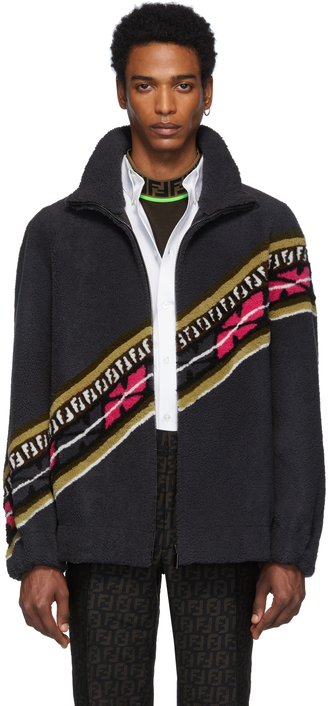

In [31]:
img

Max price currently selling on SSENSE is $14,200 and belongs to a Fendi Shearling Jacket.

In [32]:
details, img = get_minmax_item('sale-price', 'max')
details

,sub-category,brand,name,full-price,sale-price
18715,bombers,Gucci,Blue Banana Bomber Jacket,9450,9450


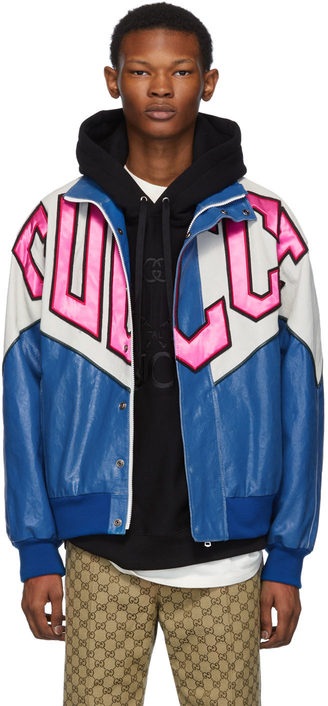

In [33]:
img

When it comes to sale price, the max sale price belongs to a Gucci Bomber Jacket, which didn't go on sale.

In [34]:
details, img = get_minmax_item('full-price', 'min')
details

,sub-category,brand,name,full-price,sale-price
987,socks,Hugo,Two-Pack Black No Show Socks,15,15
988,socks,Hugo,Two-Pack White Logo Socks,15,15
989,socks,Hugo,Two-Pack Black Logo Socks,15,15


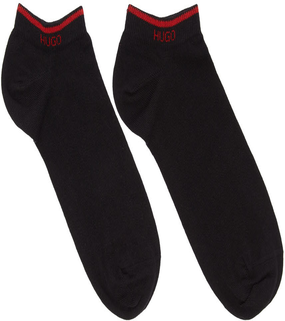

In [35]:
img

One of the cheapest items on SSENSE currently are Hugo Boss socks for $15 at full price.

In [36]:
details, img = get_minmax_item('sale-price', 'min')
details

,sub-category,brand,name,full-price,sale-price
2384,socks,Boss,Black RS Square Socks,20,9
2720,socks,Boss,Grey Square Socks,20,9
2991,socks,Boss,Two-Pack White Invisible Grip Socks,25,9


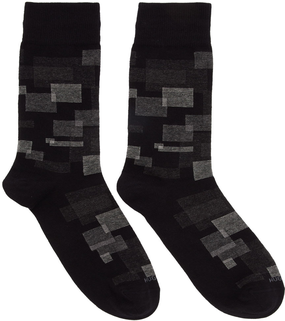

In [37]:
img

When it comes to sale price, Hugo Boss also has the cheapest item at $9.

In [38]:
details, img = get_minmax_item('discount-percent', 'max')
details

,sub-category,brand,name,full-price,sale-price
2501,iphone cases,Marcelo Burlon County of Milan,Black & White Snake Wing iPhone 8 Case,100,30
2583,caps flat caps,Nasaseasons,Black 'Almost Famous' Cap,115,35
2709,caps flat caps,Nasaseasons,Black 'I Used To Miss You' Cap,115,35
2782,caps flat caps,Nasaseasons,Black 'Expensive & Difficult' Cap,110,33
2824,socks,Givenchy,White & Blue Logo Socks,210,63
...,...,...,...,...,...
28642,high top sneakers,Martine Rose,Black Denim Basketball Sneakers,490,147
28799,low top sneakers,AMI Alexandre Mattiussi,Black Runner Sneakers,730,219
28830,zip up buckled boots,Pierre Hardy,Tan Suede Jimmy Boots,1300,390
28902,low top sneakers,AMI Alexandre Mattiussi,Green Suede Running Sneakers,730,219


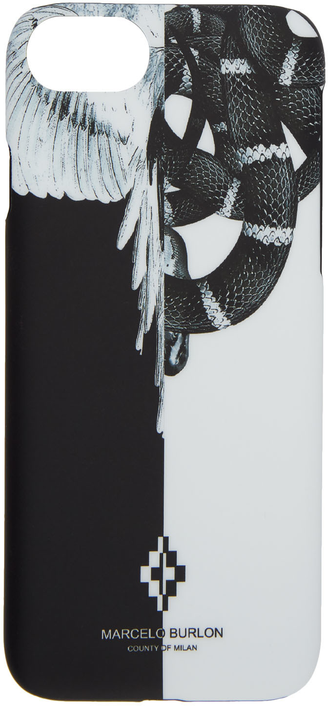

In [39]:
img

Marcelo Burlon has an iPhone case with the steepest discount on SSENSE.

Now let's look at the description.

In [40]:
all_products_df['description'][9]

'Steel oyster link bracelet in silver-tone. Brushed and polished detailing throughout. Engraved logo at flip-clasp fastening.\r\n\r\nSupplier color: Silver'

To condcuct NLP analysis on the description, we first need to take care of formatting, stopwords (i.e. words that are most common, articles, etc.) and tokensize the description strings.

In [41]:
all_products_df['name'] = all_products_df['name'].apply(lambda x: x.lower())

In [42]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def filter_txt(token): #remove words, characters that are stopwords, is a punctuation and 2 or fewer character long
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

  
def clean_txt(text): #more cleaning, lemmatization,
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text = re.sub("(\r|\n|-)+"," ",text) 
    text = re.sub("Supplier | Color | color","",text)
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if filter_txt(word)]
    clean_text2 = [word for word in clean_text if filter_txt(word)]
    return " ".join(clean_text2)

In [43]:
all_products_df['processed-description'] = all_products_df['description'].apply(clean_txt)

In [44]:
all_products_df['processed-description'][0]

'rib knit cashmere beanie black roll brim color black'

In [45]:
product_words = seperator.join([str(i) for i in list(all_products_df['processed-description'])])

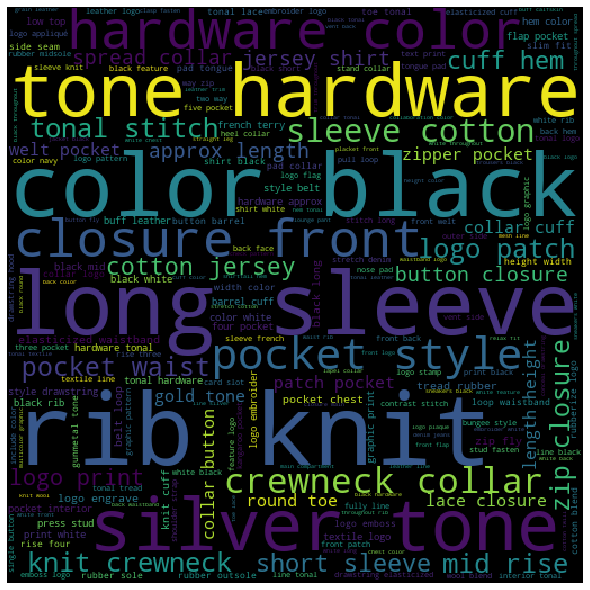

In [46]:
product_wc = WordCloud(width = 512,height = 512).generate(product_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(product_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Words that are most common in the description include rib knit, tone hardware, long sleeve, silver tone. This will help with similar product recommendation.

In [47]:
all_products_df.head()

,creation-date,sub-category,brand,name,sku,description,origin,composition,full-price,sale-price,discount-percent,remaining-sizes,image,price_range,processed-description
0,2019-12-18,beanies,The Elder Statesman,black short bunny echo beanie,201014M138001,Rib knit cashmere beanie in black. Rolled brim...,United States,100% cashmere.,355,355,0,['UNI'],https://img.ssensemedia.com/images/201014M1380...,251-500,rib knit cashmere beanie black roll brim color...
1,2019-12-18,beanies,PS by Paul Smith,red wool zebra beanie,201422M138012,Rib knit lambswool beanie in red. Signature gr...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...,101-250,rib knit lambswool beanie red signature graphi...
2,2019-12-18,beanies,PS by Paul Smith,black wool zebra beanie,201422M138013,Rib knit lambswool beanie in navy. Signature g...,United Kingdom,100% lambswool.,125,125,0,['UNI'],https://img.ssensemedia.com/images/201422M1380...,101-250,rib knit lambswool beanie navy signature graph...
3,2019-12-18,iphone cases,Maison Margiela,black pouch iphone case,201168M170261,Grained leather shoulder bag-style iPhone case...,Italy,Leather.,420,420,0,['UNI'],https://img.ssensemedia.com/images/201168M1702...,251-500,grain leather shoulder bag style iphone case b...
4,2019-12-18,necklaces,Maison Margiela,silver key necklace,201168M145213,Curb chain necklace in sterling silver. Logo a...,Italy,925 sterling silver.,635,635,0,['UNI'],https://img.ssensemedia.com/images/201168M1452...,501-1000,curb chain necklace sterling silver logo text ...


In [48]:
#Top and bottom 5,000 products sorted by price

top5k = all_products_df.sort_values(by = ['sale-price'], ascending=False)[:5000]

bottom5k =  all_products_df.sort_values(by = ['sale-price'])[:5000]

In [49]:
top5k_product_words = seperator.join([str(i) for i in list(top5k['processed-description'])])
bottom5k_product_words = seperator.join([str(i) for i in list(bottom5k['processed-description'])])

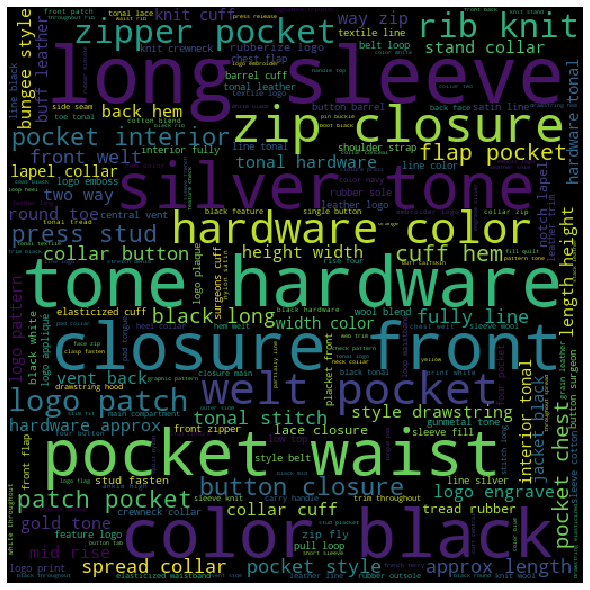

In [50]:
top5k_product_wc = WordCloud(width = 512,height = 512).generate(top5k_product_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(top5k_product_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

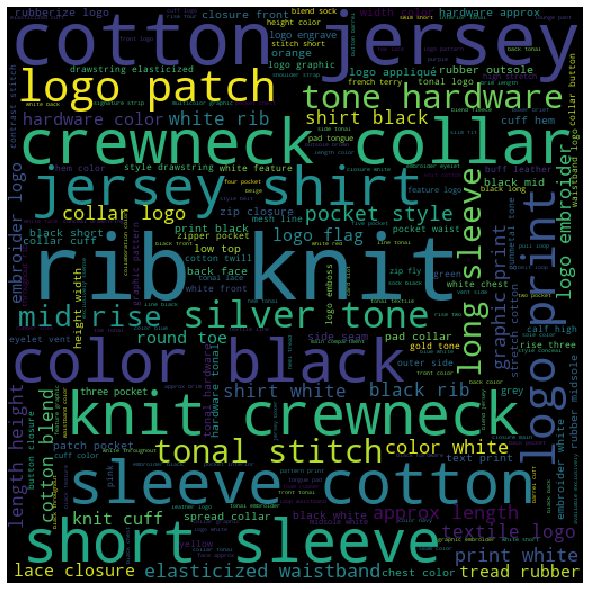

In [51]:
bottom5k_product_wc = WordCloud(width = 512,height = 512).generate(bottom5k_product_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(bottom5k_product_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()